<a href="https://colab.research.google.com/github/y-nagayoshi/machine-learning-starting-with-Python/blob/main/1%E7%AB%A0_%E3%81%AF%E3%81%98%E3%82%81%E3%81%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.1 MB/s eta 0:00:00


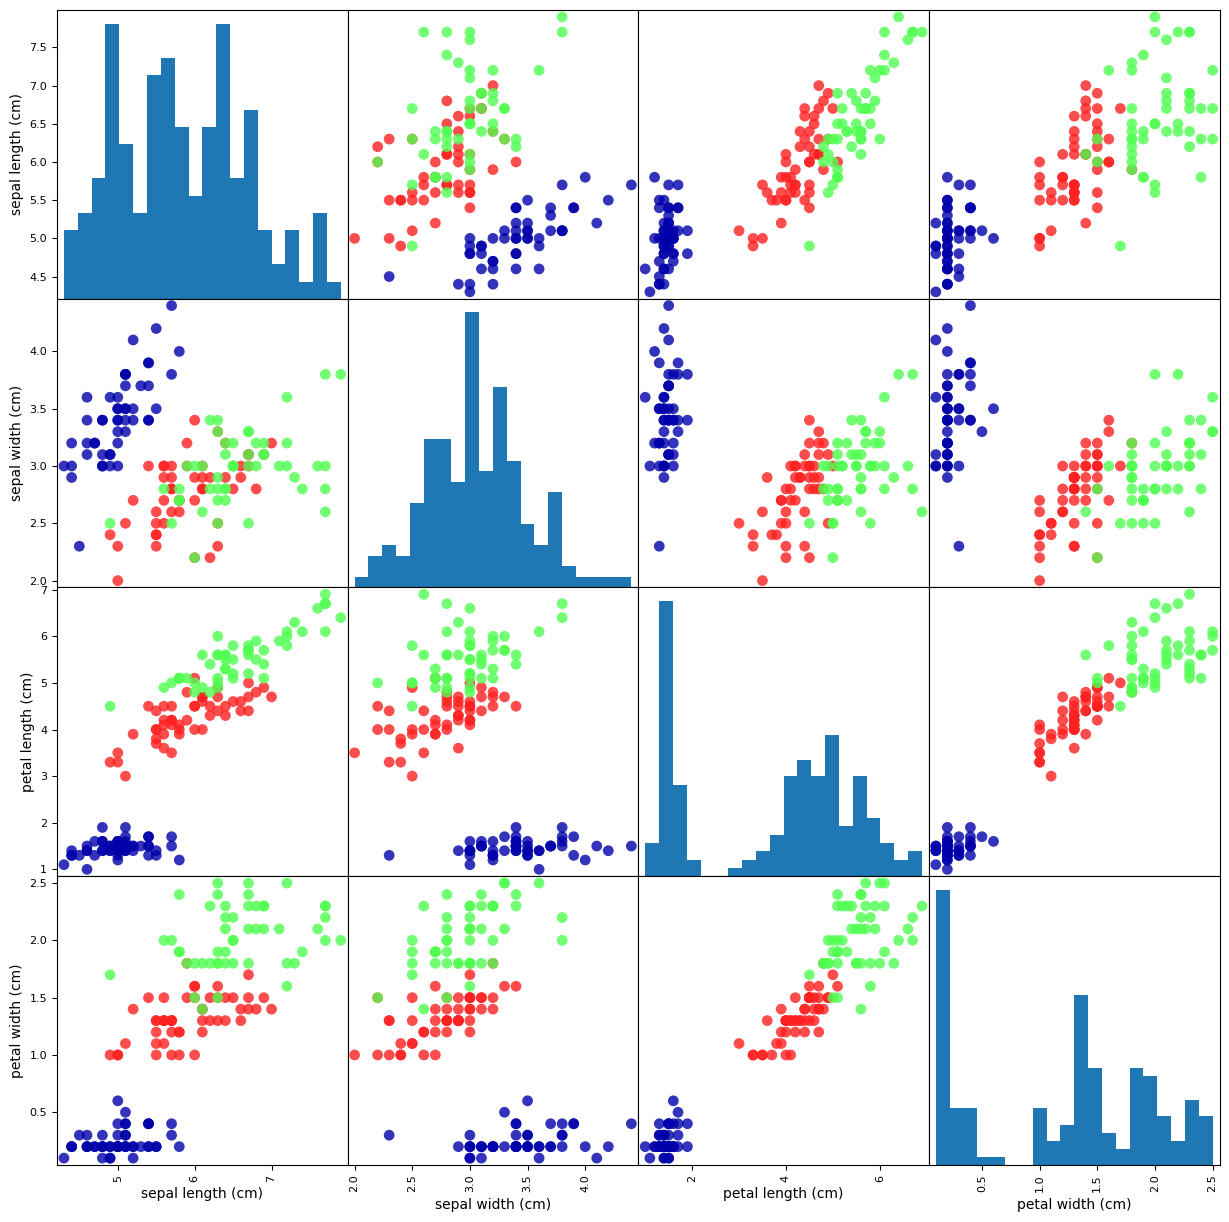

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import mglearn

iris = load_iris()
X_train = iris.data
y_train = iris.target

# X_trainのデータからDataFrameを作る、
# iris_dataset.feature_namesの文字列を使ってカラムに名前を付ける。
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
# データフレームからscatter matrixを作成し、y_trainに従って色を付ける。
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [ ]:
# 1.7.4　最初のモデル：k-最近傍法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)

In [ ]:
prediction

array([0])

In [ ]:
mat = knn.kneighbors_graph(X=X_train, n_neighbors=1)

In [ ]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

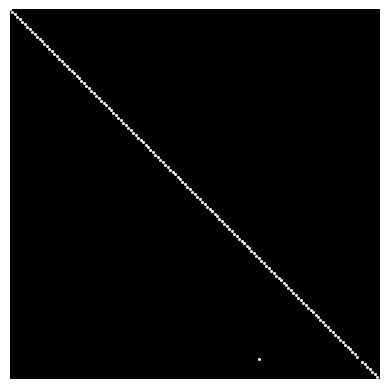

In [ ]:
ax = plot_coo_matrix(mat)
ax.figure.show()